In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


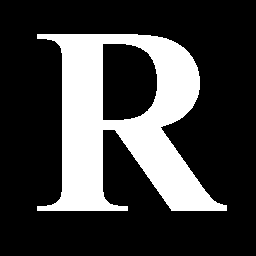

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/char.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

### 팽창 연산

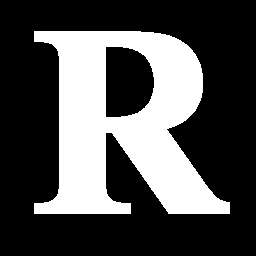

In [ ]:
kernel = np.ones((3,3), np.uint8)
dilateImg = cv2.dilate(gImg, kernel, iterations = 3)
cv2_imshow(dilateImg)

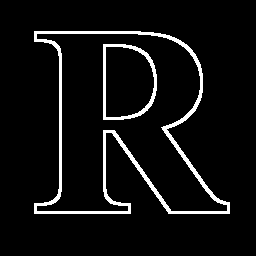

In [ ]:
edgeImg = dilateImg - gImg
cv2_imshow(edgeImg)

### 그레이 영상에 대한 팽창 연산

(256, 256)


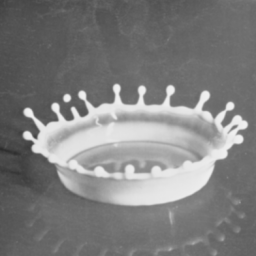

In [2]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/milkdrop.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg2.shape)
#plt.imshow(gImg2, cmap='gray')
cv2_imshow(gImg2)

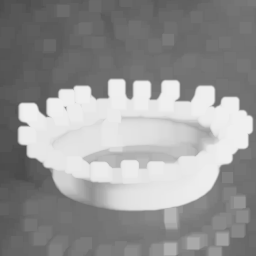

In [3]:
kernel = np.ones((3,3), np.uint8)
dilateImg2 = cv2.dilate(gImg2, kernel, iterations = 5)
cv2_imshow(dilateImg2)

이진영상으로 바꿔서 팽창 연산

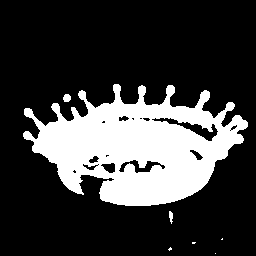

In [5]:
gBin = np.zeros((gImg2.shape[0], gImg2.shape[1]), dtype = np.ubyte)

threshold = 150

for h in range(gImg2.shape[0]):
  for w in range(gImg2.shape[1]):
    if (gImg2[h,w] > threshold):
      gBin[h,w] = 255

cv2_imshow(gBin)

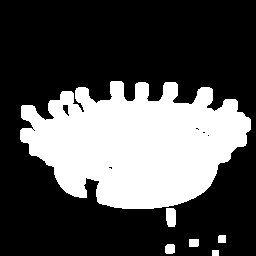

In [7]:
kernel = np.ones((3,3), np.uint8)
dilateImg3 = cv2.dilate(gBin, kernel, iterations = 3)
cv2_imshow(dilateImg3)

## 침식 연산 + 팽창 연산

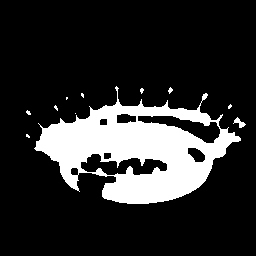

In [9]:
kernel = np.ones((3,3), np.uint8)
erodeImg = cv2.erode(gBin, kernel, iterations = 2)
cv2_imshow(erodeImg)  #결과: 노이즈 완전 제거, but milkdrop 영역도 제거됨

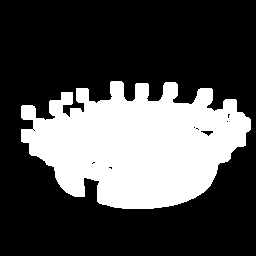

In [11]:
kernel = np.ones((3,3), np.uint8)
dilateImg4 = cv2.dilate(erodeImg, kernel, iterations = 5)
cv2_imshow(dilateImg4)  #침식 연산 후 팽창 연산 적용: 노이즈 제거되고 milkdrop 영역도 채워짐